# PCA(Principal Component)

## Q1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
dt = pd.read_table('airpollution.dat', sep="\s+")

In [9]:
dt.head()

,X1,X2,X3,X4,X5,X6,X7
0,8,98,7,2,12,8,2
1,7,107,4,3,9,5,3
2,7,103,4,3,5,6,3
3,10,88,5,2,8,15,4
4,6,91,4,2,8,10,3


공분산 행렬로 PCA를 진행하면, 데이터의 단위나 치우침에 영향을 많이 받는다.      
따라서 상관계수 행렬을 사용하면 효율적일 수 있다

In [10]:
dt.shape  # 42일에 특정 장소를 관찰한 것

(42, 7)

In [17]:
# 표본 공분산 행렬 (변수별 선형 연관도)
cov_matrix = dt.cov() 
cov_matrix

,X1,X2,X3,X4,X5,X6,X7
X1,2.500000,-2.780488,-0.378049,-0.463415,-0.585366,-2.231707,0.170732
X2,-2.780488,300.515679,3.909408,-1.386760,6.763066,30.790941,0.623693
X3,-0.378049,3.909408,1.522067,0.673635,2.314750,2.821719,0.141696
X4,-0.463415,-1.386760,0.673635,1.182346,1.088269,-0.810685,0.176539
X5,-0.585366,6.763066,2.314750,1.088269,11.363531,3.126597,1.044135
X6,-2.231707,30.790941,2.821719,-0.810685,3.126597,30.978513,0.594657
X7,0.170732,0.623693,0.141696,0.176539,1.044135,0.594657,0.478513


In [18]:
# 표본 상관계수 행렬
corr_matrix = dt.corr()
corr_matrix

,X1,X2,X3,X4,X5,X6,X7
X1,1.000000,-0.101442,-0.193803,-0.269543,-0.109825,-0.253593,0.156098
X2,-0.101442,1.000000,0.182793,-0.073569,0.115732,0.319124,0.052010
X3,-0.193803,0.182793,1.000000,0.502152,0.556584,0.410929,0.166032
X4,-0.269543,-0.073569,0.502152,1.000000,0.296898,-0.133952,0.234704
X5,-0.109825,0.115732,0.556584,0.296898,1.000000,0.166642,0.447768
X6,-0.253593,0.319124,0.410929,-0.133952,0.166642,1.000000,0.154451
X7,0.156098,0.052010,0.166032,0.234704,0.447768,0.154451,1.000000


### Cov_matrix's Eigen values/vec

In [19]:
np.linalg.eig(cov_matrix)  # eigen_values, eigen_vectors

(array([3.04257864e+02, 2.82761046e+01, 1.14644830e+01, 2.52432956e+00,
        1.27952466e+00, 2.09615710e-01, 5.28728802e-01]),
 array([[-1.00392444e-02,  7.62243931e-02, -3.08776133e-02,
         -9.20304575e-01,  3.42385929e-01, -1.69729925e-01,
          1.17790791e-02],
        [ 9.93199405e-01,  1.16155184e-01, -6.59069041e-03,
          2.11867902e-04,  2.23910224e-03, -1.78198685e-03,
          3.35321831e-03],
        [ 1.40623139e-02, -9.95677536e-02,  1.82826406e-01,
          1.38292241e-01,  6.50077606e-01,  4.43577538e-01,
         -5.63893916e-01],
        [-4.71017476e-03,  1.32042303e-02,  1.30215530e-01,
          3.27784262e-01,  6.43156049e-01, -4.62855916e-01,
          4.97513370e-01],
        [ 2.42556443e-02, -1.50381126e-01,  9.55263184e-01,
         -1.02371902e-01, -2.06584040e-01, -1.05029951e-01,
         -9.00929937e-03],
        [ 1.12429558e-01, -9.73359044e-01, -1.69810247e-01,
         -6.32480276e-02, -2.93572560e-04, -6.69924043e-02,
          5.106

In [23]:
# total variance와 설명력 비교
cov_sum = np.sum(np.linalg.eig(cov_matrix)[0])   # total variance
np.linalg.eig(cov_matrix)[0]/cov_sum

array([8.72948001e-01, 8.11271357e-02, 3.28928146e-02, 7.24256858e-03,
       3.67109161e-03, 6.01409649e-04, 1.51697887e-03])

80% 정도가 principle component에 의해 설명됨

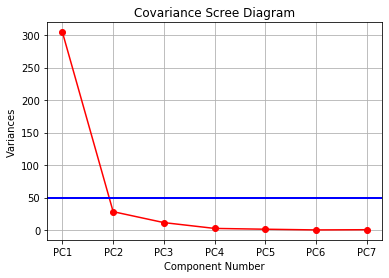

In [71]:
# scree plot
eigen_val = np.linalg.eig(cov_matrix)[0]
np.sort(eigen_val)
index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7']
plt.plot(index, eigen_val, 'ro-')
plt.xlabel('Component Number')
plt.ylabel('Variances')
plt.title('Covariance Scree Diagram')
plt.axhline(y=49.79152148664349, color='b', linewidth=2)
plt.grid(True)
plt.show()

In [65]:
# Kaiser's rule
cov_sum/corr_sum   # 49보다 설명력 낮은 친구들은 버리기

49.79152148664349

### Corr_matrix's Eigen values/vec

In [20]:
np.linalg.eig(corr_matrix)  # eigen_values, eigen_vectors

(array([2.33678264, 0.15589895, 1.38600067, 1.20406593, 0.53668879,
        0.65347654, 0.72708648]),
 array([[ 0.23682109, -0.24146701,  0.27844514, -0.64347435,  0.22357922,
         -0.56053441,  0.17271949],
        [-0.20556654, -0.01126548, -0.52661387, -0.22446898,  0.00570085,
          0.15613432,  0.7781366 ],
        [-0.55108389,  0.58524622, -0.0068195 ,  0.11360892,  0.10953891,
         -0.57342221,  0.0053018 ],
        [-0.37761508, -0.46088973,  0.43467425,  0.40709777,  0.45023478,
          0.0566907 ,  0.29050305],
        [-0.49801614, -0.33784371,  0.19976737, -0.19655673, -0.74496871,
         -0.0502143 , -0.04242818],
        [-0.32455063, -0.41707805, -0.56697365, -0.15984653,  0.33058307,
         -0.08024349, -0.5079159 ],
        [-0.31940315,  0.31391372,  0.30788277, -0.54104842,  0.26646981,
          0.56607057, -0.14308235]]))

In [26]:
# total variance와 설명력 비교
corr_sum = np.sum(np.linalg.eig(corr_matrix)[0])  # total variance
np.linalg.eig(corr_matrix)[0]/corr_sum

array([0.33382609, 0.02227128, 0.1980001 , 0.17200942, 0.07666983,
       0.09335379, 0.1038695 ])

33%가 principle components에 의해 설명됨

In [59]:
eigen_val = np.linalg.eig(corr_matrix)[0]
eigen_val = np.sort(eigen_val)
eigen_val

array([0.15589895, 0.53668879, 0.65347654, 0.72708648, 1.20406593,
       1.38600067, 2.33678264])

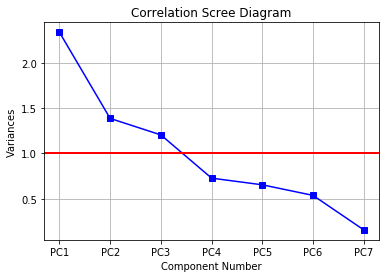

In [72]:
index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7']
plt.plot(index, [ 2.33678264,1.38600067, 1.20406593,0.72708648,0.65347654,0.53668879,0.15589895], 'bs-')
plt.xlabel('Component Number')
plt.ylabel('Variances')
plt.title('Correlation Scree Diagram')
plt.grid(True)
plt.plot([1.0])
plt.axhline(y=1, color='r', linewidth=2)
plt.show()

corr matrix에서 나온 component는 elbow plot이 두드러지지 않는 수준임!

In [73]:
# Kaiser's rule에 따라 eigen values가 1보다 낮은건 버리기!

## Q2

In [2]:
dt = pd.read_table('stock.dat', sep="\s+", names=["JP Morgan", "Citibank", "Wells Fargo ", "Royal Dutch Shell", "Exxon Mobil"])
dt.head()

,JP Morgan,Citibank,Wells Fargo,Royal Dutch Shell,Exxon Mobil
0,0.013034,-0.007843,-0.003189,-0.044769,0.005215
1,0.008486,0.016689,-0.006210,0.011956,0.013489
2,-0.017915,-0.008639,0.010036,0.000000,-0.006143
3,0.021559,-0.003486,0.017435,-0.028592,-0.006953
4,0.010822,0.003717,-0.010134,0.029190,0.040975


In [3]:
dt.shape  # 42일에 특정 장소를 관찰한 것

(103, 5)

In [4]:
# 표본 공분산 행렬 (변수별 선형 연관도)
cov_matrix = dt.cov() 
cov_matrix

,JP Morgan,Citibank,Wells Fargo,Royal Dutch Shell,Exxon Mobil
JP Morgan,0.000433,0.000276,0.000159,0.000064,0.000089
Citibank,0.000276,0.000439,0.000180,0.000181,0.000123
Wells Fargo,0.000159,0.000180,0.000224,0.000073,0.000061
Royal Dutch Shell,0.000064,0.000181,0.000073,0.000722,0.000508
Exxon Mobil,0.000089,0.000123,0.000061,0.000508,0.000766


In [5]:
# 표본 상관계수 행렬
corr_matrix = dt.corr()
corr_matrix

,JP Morgan,Citibank,Wells Fargo,Royal Dutch Shell,Exxon Mobil
JP Morgan,1.000000,0.632288,0.510497,0.114602,0.154463
Citibank,0.632288,1.000000,0.574142,0.322292,0.212675
Wells Fargo,0.510497,0.574142,1.000000,0.182499,0.146207
Royal Dutch Shell,0.114602,0.322292,0.182499,1.000000,0.683378
Exxon Mobil,0.154463,0.212675,0.146207,0.683378,1.000000


### Cov_matrix's Eigen values/vec

In [20]:
np.linalg.eig(cov_matrix)  # eigen_values, eigen_vectors

(array([0.00136768, 0.00070116, 0.0002538 , 0.0001426 , 0.00011889]),
 array([[ 0.22282283,  0.62522603, -0.32611218, -0.662759  ,  0.11765952],
        [ 0.30728997,  0.57039003,  0.24959014,  0.4140935 , -0.58860803],
        [ 0.1548103 ,  0.34450492,  0.03763929,  0.49704993,  0.78030428],
        [ 0.63896798, -0.24794753,  0.64249741, -0.30886888,  0.14845546],
        [ 0.65090441, -0.32184779, -0.64586064,  0.21637575, -0.09371777]]))

In [21]:
# total variance와 설명력 비교
cov_sum = np.sum(np.linalg.eig(cov_matrix)[0])   # total variance
np.linalg.eig(cov_matrix)[0]/cov_sum

array([0.52926066, 0.27133298, 0.09821584, 0.055184  , 0.04600652])

In [22]:
eigen_val = np.linalg.eig(cov_matrix)[0]
# eigen_val = np.sort(eigen_val)
eigen_val

array([0.00136768, 0.00070116, 0.0002538 , 0.0001426 , 0.00011889])

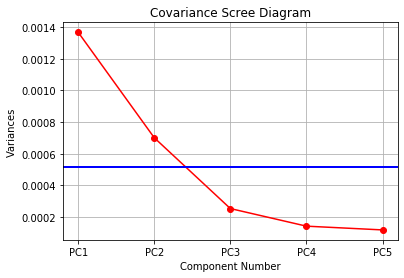

In [23]:
# scree plot
index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
plt.plot(index, eigen_val, 'ro-')
plt.xlabel('Component Number')
plt.ylabel('Variances')
plt.title('Covariance Scree Diagram')
plt.axhline(y=0.0005168258871215464, color='b', linewidth=2)  # Kaiser's rule
plt.grid(True)
plt.show()

In [14]:
# Kaiser's rule
cov_sum/corr_sum   # 49보다 설명력 낮은 친구들은 버리기

0.0005168258871215464

### Corr_matrix's Eigen values/vec

In [10]:
np.linalg.eig(corr_matrix)  # eigen_values, eigen_vectors

(array([2.43727312, 1.40701266, 0.25516988, 0.50051275, 0.40003159]),
 array([[ 0.46908321,  0.36800696,  0.3841216 ,  0.60431522,  0.36302278],
        [ 0.53240549,  0.23646236, -0.49618794,  0.13610618, -0.6292079 ],
        [ 0.46516333,  0.3151795 ,  0.07116948, -0.7718281 ,  0.28896583],
        [ 0.38734594, -0.58503725,  0.59466408, -0.09336192, -0.38125151],
        [ 0.36068206, -0.60584628, -0.49755167,  0.10882629,  0.49341454]]))

In [11]:
# total variance와 설명력 비교
corr_sum = np.sum(np.linalg.eig(corr_matrix)[0])  # total variance
np.linalg.eig(corr_matrix)[0]/corr_sum

array([0.48745462, 0.28140253, 0.05103398, 0.10010255, 0.08000632])

In [12]:
eigen_val = np.linalg.eig(corr_matrix)[0]
eigen_val = np.sort(eigen_val)
eigen_val

array([0.25516988, 0.40003159, 0.50051275, 1.40701266, 2.43727312])

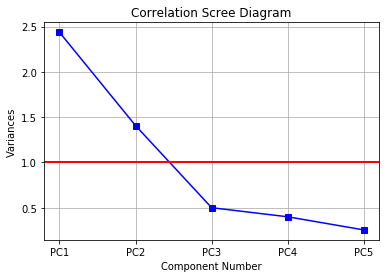

In [13]:
index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
plt.plot(index, [2.43727312, 1.40701266, 0.50051275, 0.40003159,0.25516988], 'bs-')
plt.xlabel('Component Number')
plt.ylabel('Variances')
plt.title('Correlation Scree Diagram')
plt.grid(True)
plt.plot([1.0])
plt.axhline(y=1, color='r', linewidth=2)
plt.show()

In [19]:
print('평균 : ', dt.mean())
print('--------------------------')
print('분산 : ', dt.var())

평균 :  JP Morgan            0.001063
Citibank             0.000655
Wells Fargo          0.001626
Royal Dutch Shell    0.004049
Exxon Mobil          0.004039
dtype: float64
--------------------------
분산 :  JP Morgan            0.000433
Citibank             0.000439
Wells Fargo          0.000224
Royal Dutch Shell    0.000722
Exxon Mobil          0.000766
dtype: float64


### PCA로 summarized된 변수 plotting

In [25]:
dt.head()

,JP Morgan,Citibank,Wells Fargo,Royal Dutch Shell,Exxon Mobil
0,0.013034,-0.007843,-0.003189,-0.044769,0.005215
1,0.008486,0.016689,-0.006210,0.011956,0.013489
2,-0.017915,-0.008639,0.010036,0.000000,-0.006143
3,0.021559,-0.003486,0.017435,-0.028592,-0.006953
4,0.010822,0.003717,-0.010134,0.029190,0.040975


In [35]:
from sklearn.decomposition import PCA  # 귀찮아서 그만 sklearn on.....
pca = PCA(n_components=2)
pc = pca.fit_transform(dt)

In [49]:
pc.T[0]

array([ 0.03111715, -0.01657136,  0.01499739,  0.02226933, -0.04140105,
       -0.00202038, -0.02804685, -0.01518333,  0.04522015,  0.02271324,
        0.02738595, -0.04899591, -0.01652541, -0.01867308,  0.04581489,
        0.01577824, -0.00672806,  0.01218695,  0.02480953, -0.04070213,
       -0.00018595, -0.02134285, -0.02627399,  0.02108251,  0.01993961,
       -0.00121964,  0.01202055,  0.0394837 , -0.02635024,  0.04966461,
       -0.02343585, -0.03481101, -0.01012921, -0.03495716,  0.00217259,
       -0.0129892 ,  0.04888694, -0.03365189, -0.01178767,  0.0255964 ,
        0.02917307, -0.04581363, -0.04587593, -0.02213877,  0.03369799,
       -0.03679159,  0.02297076,  0.01775484,  0.00277074, -0.0593013 ,
        0.01744257,  0.03970708, -0.00379576,  0.01354872, -0.02507689,
       -0.09600734,  0.00112945, -0.04774968, -0.04710179, -0.02603222,
        0.06313113,  0.00298335,  0.10085244, -0.02021337, -0.01032782,
        0.07261822, -0.05280345,  0.02574443, -0.00429283,  0.09

Text(0.5, 1.0, 'Scatter plot from principle components')

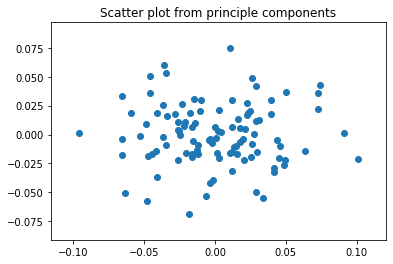

In [51]:
plt.scatter(pc.T[0], pc.T[1])
plt.title('Scatter plot from principle components')